## 2. Getting started with AutoKeras

#### Installing Auto-Keras

In [ ]:
# Install AutoKeras
!pip3 install autokeras

In [ ]:
import autokeras as ak
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

#### Getting the MNIST dataset
We have first to download the MNIST data and have a quick look to the dataset shape

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


We can see from the output above that each dataset contains images of size 28x28 pixels.
Now let's see what a digit looks like 




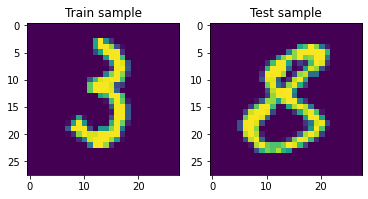

In [ ]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(x_train[1234])
ax.set_title('Train sample')
ax = fig.add_subplot(1, 2, 2)
plt.imshow(x_test[1234])
ax.set_title('Test sample')
plt.show()



#### How the digits are distributed?

When we are working with data sets, it is very important to check that the data is distributed homogeneously, this can be done easily using numpy functions.

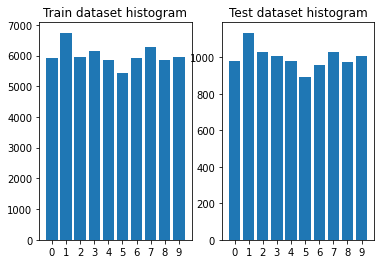

In [ ]:
train_histogram = np.histogram(y_train)
test_histogram = np.histogram(y_test)
_, axs = plt.subplots(1, 2)
axs[0].set_xticks(range(10))
axs[0].bar(range(10), train_histogram[0])
axs[0].set_title('Train dataset histogram')
axs[1].set_xticks(range(10))
axs[1].bar(range(10), test_histogram[0])
axs[1].set_title('Test dataset histogram')
plt.show()

#### Creating an image classifier

Now, we will use the AutoKeras ImageClassifier to find the best classification model. Just for this little example, we set max_trials (the maximum number of different Keras Models to try) to 1 and the number of epochs to train each model to 20, but for real use it is recommended to set a large number of trials and not to set the epochs parameter to use an adaptive number of epochs automatically.

In [ ]:
# Create a image classifier object defining
clf = ak.ImageClassifier(
    overwrite=True,
    max_trials=1)

# Search for the optimal classifier for the MNIST training dataset
clf.fit(x_train, y_train, epochs=20)

Trial 1 Complete [00h 02m 02s]
val_loss: 0.0394585020840168

Best val_loss So Far: 0.0394585020840168
Total elapsed time: 00h 02m 02s
INFO:tensorflow:Oracle triggered exit
Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1585 - accuracy: 0.9510
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0760 - accuracy: 0.9767
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0595 - accuracy: 0.9817
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0513 - accuracy: 0.9841
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0466 - accuracy: 0.9844
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0410 - accuracy: 0.9865
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0381 - accuracy: 0.9881
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0346 - accuracy: 0.9885
Epoch 9/20
1

#### Evaluating the model with the test set
After training it's time to measure the real prediction of our model using the reserved test dataset

In [ ]:
metrics = clf.evaluate(x_test, y_test)
print(metrics)

313/313 [==============================] - 1s 2ms/step - loss: 0.0392 - accuracy: 0.9890
[0.039151791483163834, 0.9890000224113464]


Lets see how is predicting this single sample

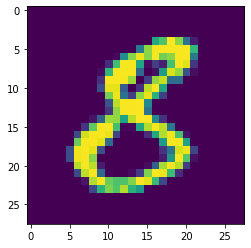

In [ ]:
fig = plt.figure()
plt.imshow(x_test[1234])
ax.set_title('Test sample')
plt.show()

In [ ]:
print(y_test[1234]) # First we print the true value from the label dataset
print(clf.predict(x_test[1234, None])) # Now we print the predicted value using our classifier 

8
[['8']]


#### Visualizing the classifier model
[Now we can take a look at the architecture of the best generated model](https://)

In [ ]:
# First we export the model to a keras model
model = clf.export_model()

# Now, we ask for the model Sumary:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 28, 28)            0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 28, 28, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 28, 28, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)       

As we did with the classifier, there is a more visual way to see it


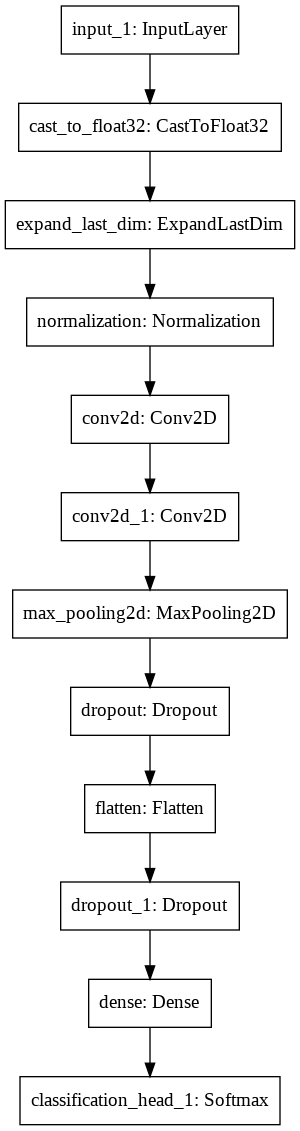

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(clf.export_model())

#### Creating an image regressor

Now, we will use a different approach to figure out the digit values from the image, a regression model call regressor. 

The image regressor will try to predict the scalar value of the digit, instead to classify it in a 0-9 a category. 

AutoKeras has already a special class ready to use called ImageRegressor, that will find the best 
regression model. 

As we did with the classifier, for this little example, we set max_trials (the maximum number of different Keras Models to try) to 1 and the number of epochs to train each model to 20, but for real use it is recommended to set a large number of trials and not to set the epochs parameter to use an adaptive number of epochs automatically.

In [ ]:
# Initialize the image regressor.
reg = ak.ImageRegressor(
    overwrite=True,
    max_trials=1)

# Feed the image regressor with training dataset.
reg.fit(x_train, y_train, epochs=20)

# Predict with the best model found.
predicted_y = reg.predict(x_test)

# Evaluate the best model with testing dataset.
reg.evaluate(x_test, y_test)

Trial 1 Complete [00h 20m 13s]
val_loss: 0.12817470729351044

Best val_loss So Far: 0.12817470729351044
Total elapsed time: 00h 20m 13s
INFO:tensorflow:Oracle triggered exit
Epoch 1/20
1875/1875 [==============================] - 70s 37ms/step - loss: 4.6799 - mean_squared_error: 4.6799
Epoch 2/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.9664 - mean_squared_error: 0.9664
Epoch 3/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.5637 - mean_squared_error: 0.5637
Epoch 4/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.5392 - mean_squared_error: 0.5392
Epoch 5/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.5031 - mean_squared_error: 0.5031
Epoch 6/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.4753 - mean_squared_error: 0.4753
Epoch 7/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.4194 - mean_squared_error: 0.4194
Epoch 8/20
1875/1875 [======

In [ ]:
# Predict with the best model found the first 10 digits.
predicted_y = reg.predict(x_test[:10])
# Print the first 10 true values
print(list(y_test[:10]))
# Print the predicted values to compare
print([round(float(i)) for i in predicted_y])


NameError: ignored

As you can see it's predinting the true value in everyone of the cases. Let's see it in a more graphical way

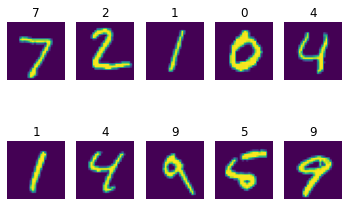

In [ ]:
fig = plt.figure()
for i, v in enumerate(predicted_y):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_axis_off()
    ax.set_title(round(float(v)))
    plt.imshow(x_test[i])
plt.show()

Notice that we have rounded up the float values returned by the regressor to compare them to the true values, this is done because regressors always return continuous values that they approximate the real value, so if we want to predict discrete values (0 to 9 digits) we have to do a rounding to return the predicted value.

### Visualizing the regressor model


In [ ]:
# First we export the model to a keras model
model = reg.export_model()

# Now, we ask for the model Sumary:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
cast_to_float32 (CastToFloat32) (None, 28, 28)       0           input_1[0][0]                    
__________________________________________________________________________________________________
expand_last_dim (ExpandLastDim) (None, 28, 28, 1)    0           cast_to_float32[0][0]            
__________________________________________________________________________________________________
resizing (Resizing)             (None, 32, 32, 1)    0           expand_last_dim[0][0]            
_______________________________________________________________________________________

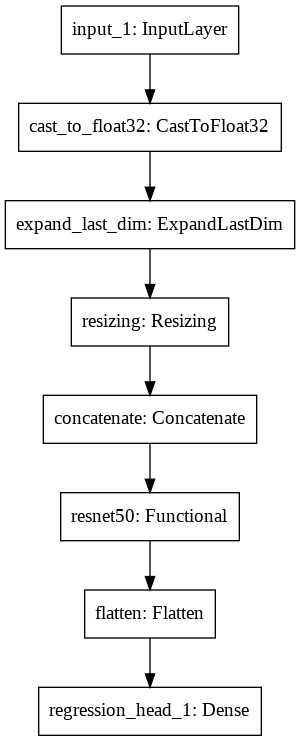

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(reg.export_model())